In [23]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os 

In [2]:
df = pd.read_csv('superstore_sales.csv')
df.head(20)

,Order_ID,Date,Customer_ID,Category,Product,Price,Quantity,Discount,Profit
0,1,2023-01-01,4174,Groceries,Jacket,117.82,5,0.02,468.58
1,2,2023-01-02,4507,Furniture,Laptop,722.01,1,0.33,198.93
2,3,2023-01-03,1860,Furniture,Laptop,502.80,3,0.26,225.04
3,4,2023-01-04,2294,Furniture,Chair,894.63,3,0.41,478.71
4,5,2023-01-05,2130,Electronics,Sofa,920.27,4,0.15,202.15
5,6,2023-01-06,2095,Groceries,Sofa,59.88,6,0.41,226.95
6,7,2023-01-07,4772,Clothing,Sofa,821.54,5,0.21,132.74
7,8,2023-01-08,4092,Clothing,Headphones,NaN,1,0.05,-32.60
8,9,2023-01-09,2638,Groceries,Bananas,370.33,6,0.49,188.18
9,10,2023-01-10,3169,Furniture,Sofa,544.59,9,0.26,310.30


In [3]:
df.isnull().sum()

Order_ID         0
Date             0
Customer_ID      0
Category         0
Product          0
Price          200
Quantity         0
Discount         0
Profit         150
dtype: int64

In [6]:
df['Price'].fillna(df['Price'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8956\3200313070.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].median(), inplace=True)


In [8]:
df.isnull().sum()

Order_ID         0
Date             0
Customer_ID      0
Category         0
Product          0
Price            0
Quantity         0
Discount         0
Profit         150
dtype: int64

In [9]:
df['Profit'].fillna(df['Profit'].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8956\2248011848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Profit'].fillna(df['Profit'].mean(), inplace=True)


In [10]:
df.isnull().sum()

Order_ID       0
Date           0
Customer_ID    0
Category       0
Product        0
Price          0
Quantity       0
Discount       0
Profit         0
dtype: int64

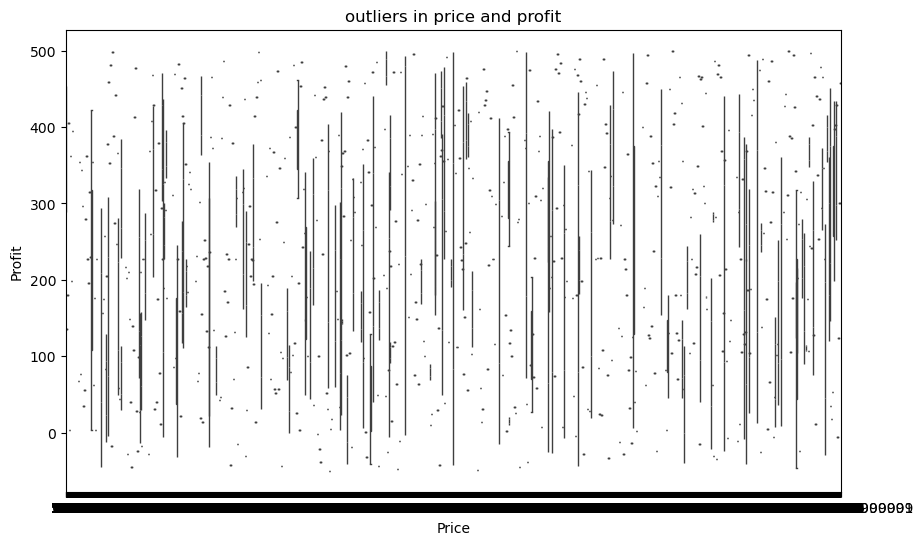

In [13]:
plt.figure(figsize= (10,6))
sns.boxplot(x=df['Price'], y=df['Profit'])
plt.title("outliers in price and profit")
plt.show()


In [14]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

In [15]:
df = df[(df['Price'] >= (Q1 - 1.5 * IQR)) & (df['Price'] <= (Q3 + 1.5 * IQR))]

In [16]:
df['Revenue'] = df['Price'] * df['Quantity']

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [18]:
df.head(20)

,Order_ID,Date,Customer_ID,Category,Product,Price,Quantity,Discount,Profit,Revenue,Year,Month
0,1,2023-01-01,4174,Groceries,Jacket,117.820,5,0.02,468.58,589.100,2023,1
1,2,2023-01-02,4507,Furniture,Laptop,722.010,1,0.33,198.93,722.010,2023,1
2,3,2023-01-03,1860,Furniture,Laptop,502.800,3,0.26,225.04,1508.400,2023,1
3,4,2023-01-04,2294,Furniture,Chair,894.630,3,0.41,478.71,2683.890,2023,1
4,5,2023-01-05,2130,Electronics,Sofa,920.270,4,0.15,202.15,3681.080,2023,1
5,6,2023-01-06,2095,Groceries,Sofa,59.880,6,0.41,226.95,359.280,2023,1
6,7,2023-01-07,4772,Clothing,Sofa,821.540,5,0.21,132.74,4107.700,2023,1
7,8,2023-01-08,4092,Clothing,Headphones,496.005,1,0.05,-32.60,496.005,2023,1
8,9,2023-01-09,2638,Groceries,Bananas,370.330,6,0.49,188.18,2221.980,2023,1
9,10,2023-01-10,3169,Furniture,Sofa,544.590,9,0.26,310.30,4901.310,2023,1


In [31]:
if 'Category' in df.columns:
    df = pd.get_dummies(df, columns=['Category'])
else:
    print("Column 'Category' not found in the dataset.")


Column 'Category' not found in the dataset.


In [32]:
df.head(20)

,Order_ID,Date,Customer_ID,Product,Price,Quantity,Discount,Profit,Revenue,Year,Month,Category_Clothing,Category_Electronics,Category_Furniture,Category_Groceries
0,1,2023-01-01,4174,Jacket,117.820,5,0.02,468.58,589.100,2023,1,False,False,False,True
1,2,2023-01-02,4507,Laptop,722.010,1,0.33,198.93,722.010,2023,1,False,False,True,False
2,3,2023-01-03,1860,Laptop,502.800,3,0.26,225.04,1508.400,2023,1,False,False,True,False
3,4,2023-01-04,2294,Chair,894.630,3,0.41,478.71,2683.890,2023,1,False,False,True,False
4,5,2023-01-05,2130,Sofa,920.270,4,0.15,202.15,3681.080,2023,1,False,True,False,False
5,6,2023-01-06,2095,Sofa,59.880,6,0.41,226.95,359.280,2023,1,False,False,False,True
6,7,2023-01-07,4772,Sofa,821.540,5,0.21,132.74,4107.700,2023,1,True,False,False,False
7,8,2023-01-08,4092,Headphones,496.005,1,0.05,-32.60,496.005,2023,1,True,False,False,False
8,9,2023-01-09,2638,Bananas,370.330,6,0.49,188.18,2221.980,2023,1,False,False,False,True
9,10,2023-01-10,3169,Sofa,544.590,9,0.26,310.30,4901.310,2023,1,False,False,True,False


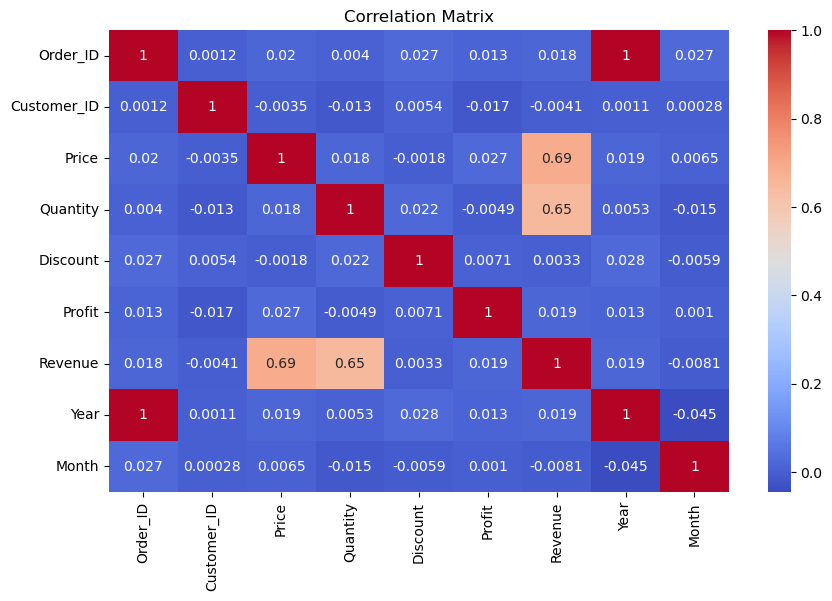

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', )  
plt.title("Correlation Matrix")
plt.show()


<Axes: title={'center': 'Monthly Revenue'}, xlabel='Month'>

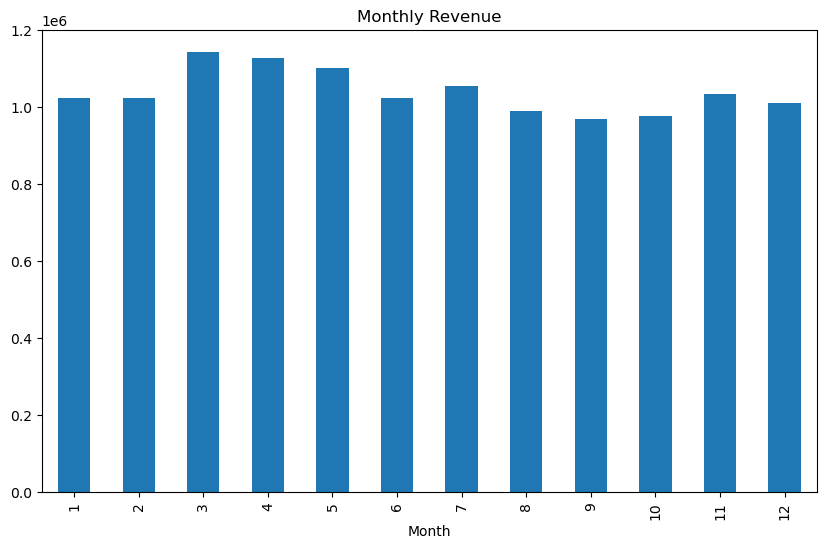

In [34]:
df.groupby('Month')['Revenue'].sum().plot(kind='bar', figsize=(10,6), title="Monthly Revenue")

In [35]:
df.columns

Index(['Order_ID', 'Date', 'Customer_ID', 'Product', 'Price', 'Quantity',
       'Discount', 'Profit', 'Revenue', 'Year', 'Month', 'Category_Clothing',
       'Category_Electronics', 'Category_Furniture', 'Category_Groceries'],
      dtype='object')